## Web-Scraping Streamgaging Measurement Data

This notebook demonstrates how to access the USGS streamgaging data from the [NWIS server](https://waterdata.usgs.gov/nwis) using python and pandas


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

The following function will import the field measurement data for a specified USGS 'gageno' (Here is a list of [all Washington State gaging sites](https://waterdata.usgs.gov/nwis/measurements?state_cd=wa&format=station_list&group_key=NONE&set_logscale_y=1&channel_html_info=0&date_format=YYYY-MM-DD&channel_rdb_info=0&rdb_compression=file&list_of_search_criteria=state_cd))

In [2]:
def import_and_save_USGS_measurement_data(gageno):                     
    #USGS Measurement data URL and column names for data link
    url = 'https://waterdata.usgs.gov/nwis/measurements?site_no='+gageno+'&agency_cd=USGS&format=rdb_expanded'
    column_names = ['agency_cd', 'site_no', 'measurement_nu', 'measurement_dt',
                    'tz_cd','q_meas_used_fg', 'party_nm',
                    'site_visit_coll_agency_cd', 'gage_height_va',
                    'discharge_va', 'measured_rating_diff', 'gage_va_change',
                    'gage_va_time','control_type_cd', 'discharge_cd','chan_nu',
                    'chan_name', 'meas_type', 'streamflow_method',
                    'velocity_method', 'chan_discharge', 'chan_width',
                    'chan_area','chan_velocity', 'chan_stability',
                    'chan_material', 'chan_evenness', 'long_vel_desc',
                    'horz_vel_desc', 'vert_vel_desc', 'chan_loc_cd',
                    'chan_loc_dist'] 
    
    #Import site data
    measdata = pd.read_csv(url, header=1, sep='\t', comment='#', 
                           names = column_names)  
    measdata.to_csv(r'USGS_gageno_%s_measurement_data.csv' 
                    %(gageno))

Here we will import USGS gage number 122013100 corresponding to the [Nooksack at Ferndale site](https://waterdata.usgs.gov/nwis/measurements/?site_no=12213100). After running this code block, you should see a `.csv` file downloaded to your local directory.

In [3]:
USGS_gageno = '12213100'
import_and_save_USGS_measurement_data(USGS_gageno)

Load this data

In [4]:
meas_data = pd.read_csv(r'USGS_gageno_%s_measurement_data.csv'%(USGS_gageno))

Convert the date measurements into a datetime object

In [5]:
meas_data['DateTime'] = pd.to_datetime(meas_data.measurement_dt)

Convert feet to meters:

In [8]:
fttom = 0.3048

meas_data['gage_height_m'] = meas_data['gage_height_va']*fttom
meas_data['discharge_cms'] = meas_data['discharge_va']*(fttom**3)

Plot the field measurement stage and discharge measurements. Points are colored by the year the measurement was obtained to visualize prospective shifts over time

Text(0.5, 1.0, 'Measurement Data (Gage #: 12213100)')

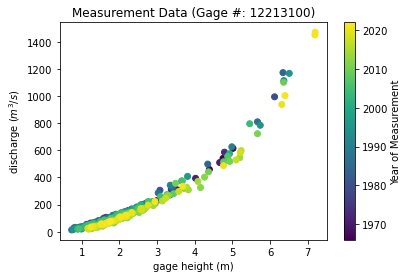

In [7]:
f, ax = plt.subplots()
pts=ax.scatter(
    meas_data.gage_height_m,
    meas_data.discharge_cms,
    c=meas_data.DateTime.dt.year,
)
plt.colorbar(pts, label='Year of Measurement')
ax.set_xlabel('gage height (m)')
ax.set_ylabel(r'discharge $(m^3/s)$')
ax.set_title('Measurement Data (Gage #: %s)'%USGS_gageno)